<a href="https://colab.research.google.com/github/clanderson23/Factors-that-Drive-Clickrate/blob/main/Capstone_III_Clickrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Execute all imports and filter warnings: 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats.stats import ttest_ind
from scipy import stats
sns.set()
from google.colab import drive
import warnings

warnings.filterwarnings('ignore')

## **Capstone III: Factors that Drive Clickrate**

By Cheryl Anderson 

Looking at clickrates for online advertising can be extremely useful for stakeholders. Let's explore the data and which factors increase clickrates.

**Dataset**:  https://www.kaggle.com/datasets/tbyrnes/advertising
Factors: "Daily Time Spent on Site," "Age," "Area Income," and "Daily Internet Usage." 

**Clickrate** is documented in the column "Clicked on Ad," which is indicated by 1 if the user clicked on the ad, and 0 if the user did not click on the ad. 

**Time** is measured in minutes. 

**Hypothesis #1**
  Null: There is no statistical significance between "Daily Time Spent on Site," and clickrate.
  Alternative: There is a statistical significance between "Daily Time Spent on Site" and clickrate.

**Hypothesis #2**
  Null: There is no statistical significance between "Age" and clickrate.
  Alternative: There is a statistical significance between "Age" and clickrate.

**Hypothesis #3**
  Null: There is no statistical significance between "Area Income" and clickrate. 
  Alternative: There is a statistical significance between "Area Income" and clickrate. 

**Hypothesis #4**
  Null: There is no statistical significance between "Daily Internet Usage," and clickrate. 



First, let's import and investigate the dataset. This data comes from Kaggle, and shows 1000 rows and 10 columns of data. 

In [ ]:
#import pandas and the dataset
#link to dataset: https://www.kaggle.com/datasets/tbyrnes/advertising

import pandas as pd
clickrate_df=pd.read_csv('/content/gdrive/My Drive/Advertising_Online_Clickrate.csv')

clickrate_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [ ]:
clickrate_df.shape

(1000, 10)

In [ ]:
clickrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Now let's look more deeply into the data. There are several factors that could drive up click rate: 1) Daily Time Spent on Site, 2) Age, 3) Area Income, and 4) Daily Internet Usage. Let's see how they compare with clickrate. 

# **Daily Time Spent on Site**

---


Let's investigate. **Null Hypothesis:** There is no statistically significant relationship between the time a user spends on the site and the clickrate. **Alternative Hypthesis:** There is a statistically significant relationship between the daily time spent on site and clickrate. 



First, let's look at some statistics about this factor. Let's investigate the average time spent on site. 

In [ ]:
#create a variable for stats about Daily Time Spent on Site
daily_time = clickrate_df['Daily Time Spent on Site'].describe()
print(daily_time)


count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64


The average Daily Time Spent on Site is 65 minutes. Now let's look at the correlation between Daily Time Spent on Site and Clicked on Ad: 

In [ ]:
import scipy as stats

In [ ]:
clickrate_df['Daily Time Spent on Site'].corr(clickrate_df['Clicked on Ad'])

-0.748116564119635

There is a strong negative relationship between these two factors. This is surprising, as it means that the more time a person spends on the site, the less likely they are to click on the ad. Let's make sure we are on the right track by doing a t-test: 

In [ ]:
stats.ttest_ind(clickrate_df['Clicked on Ad'], clickrate_df['Daily Time Spent on Site']), 

(Ttest_indResult(statistic=-128.59280365742606, pvalue=0.0),)

After running the t-test, we see that the statistic is a negative number, which indicates there is a negative relationship. In other words, the more time spent on the site, the less likely the user is to click the ad. Our p-value is 0, which indicates there is a statistical significance. 




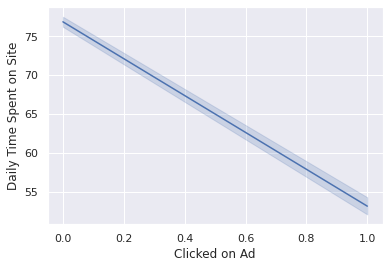

In [ ]:
sns.lineplot(x= 'Clicked on Ad', y= 'Daily Time Spent on Site', data = clickrate_df)


This graph shows that the more Daily Time Spent on Site, the less likely the user is to click on the ad (1= clicked on ad, 0= did not click on ad). Let's create a scatter plot to visualize this trend further: 

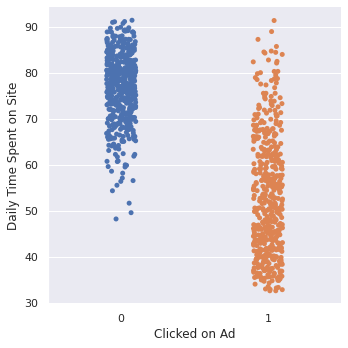

In [ ]:
sns.catplot(x='Clicked on Ad', y= 'Daily Time Spent on Site', data=clickrate_df)

From this scatterplot, we can see that the majority of users who clicked on the ad were on the site for less than the average amount of time spent by all users, which is 65 minutes. 

---

**Conclusion:** The Alternative Hypothesis is correct, there is a statistical significance of Daily Time Spent on Site to clickrate. However, it is a negative relationship. In this instance, staying on the site longer does *not* necessarily mean that the user will click on the ad.
 
**Recommendation:** The Stakeholder should consider how daily time spent on the site impacts clickrate and target users who would spend slightly less time rather than those who are online for longer. 

Let's look at how age and the other factors impact clickrate: 

# **Age**

---
How does age play a roll in clickrate? **Null Hypothesis:** There is no statistically significant relationship between age of the user and clickrate. **Alternative Hypothesis:** There is a statistically significant relationship between age of the user and clickrate. 


In [ ]:
import scipy as stats
clickrate_df['Age'].corr(clickrate_df['Clicked on Ad'])

0.4925312655560379

There is a positive correlation between "Age" and whether or not the user clicked on the ad.

In [ ]:
stats.ttest_ind(clickrate_df['Age'], clickrate_df['Clicked on Ad'])

Ttest_indResult(statistic=127.6044999165495, pvalue=0.0)

Age does have stastistically significant impact on clickrate. Now, we need to find out which age ranges have the *most* significance on clickrate. 



In [ ]:
clickrate_df['Age'].describe()

count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

The average age of the user is 36. Now let's visualize more of the age ranges so that we can better understand which groups drive clickrate. 

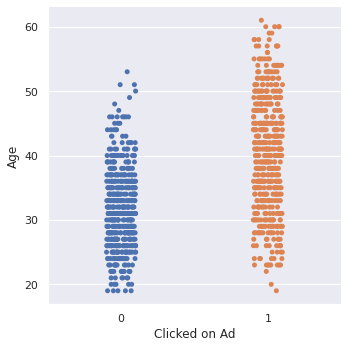

In [ ]:
sns.catplot(x="Clicked on Ad", y= "Age", data= clickrate_df)

From this graphic we see that the older users tend to click on ads (1=clicked on ad). 

Let's compare it in a box plot to get a better idea of age range: 


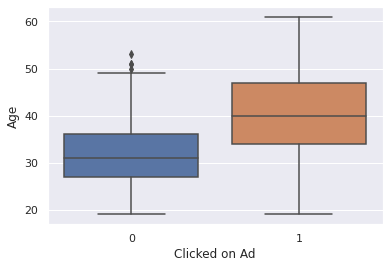

In [ ]:
#create a box plot showing clickrate for each age group
sns.boxplot(y="Age", x="Clicked on Ad", data= clickrate_df)





From this graphic, it is easy to see that users between the ages of 35-45 are the most likely to drive clickrate. 

**Conclusions:** The Alternative Hypothesis is correct, there is a statistically significant relationship between age and clickrate.
  
**Recommendation:**The Stakeholder should target ads to the age ranges demonstrated in our research. Users who are 35-45 has the highest clickrate. 

# **Area Income**


---
Now let's look at area income and clickrate. **Null Hypothesis** is that there is no statistically significant relationship between area income and clickrate. **Alternative Hypothesis** is that there is a statistically significant difference between area income and clickrate. 

It would make sense that if the area income is larger, then users who are making more money are more likely to click the ad, right? Let's test it and find out.


In [ ]:
clickrate_df['Area Income'].corr(clickrate_df['Clicked on Ad'])

-0.47625462753214454

It seems there is a strong negative relationship between Area Income and clickrate. Let's investigate it further with a t-test: 

In [ ]:
stats.ttest_ind(clickrate_df['Area Income'], clickrate_df['Clicked on Ad'])

Ttest_indResult(statistic=129.6522066972413, pvalue=0.0)

There is a stastistically strong relationship between Area Income and clickrate. The p-value is 0, which indicates it is likely to be statistically significant. 

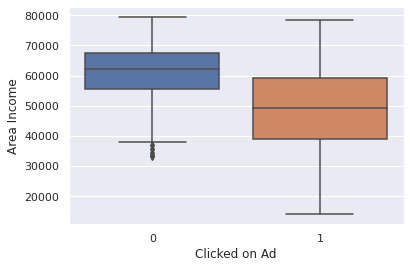

In [ ]:
sns.boxplot(y="Area Income", x= "Clicked on Ad", data=clickrate_df)

This boxplot shows that there is a statistically significant relatiohship of area income compared with users who clicked on the ad. Interestingly, middle-income users drive clickrate more than higher-income users. 

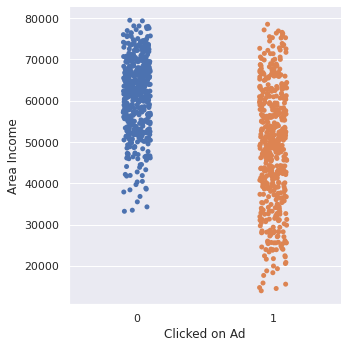

In [ ]:
sns.catplot(x="Clicked on Ad", y= "Area Income", data=clickrate_df)

This visualization confirms that lower-middle class income users click on ads more than upper-middle class income users. 

**Conclusion:**The Alternative Hypothesis is correct, there is a statistically significant relationship between income and clickrate.

**Recommendation:** The stakeholder should promote ads to users making the 39k-55k range in salary. Users who made above 55k in their salary were less likely to click on the ad. 

# **Daily Internet Usage**


---
How does Daily Internet Usage influence clickrate? **Null Hypothesis:** There is no statistcally significant relationship between daily internet usage and clickrate. **Alternative Hypothesis: **There is a statistically significant relationship between clickrate and daily internet usage. 


In [ ]:
clickrate_df['Daily Internet Usage'].corr(clickrate_df['Clicked on Ad'])

-0.7865391758714904

There appears to be a strong negative relationship between Daily Internet Usage and ad clickrate. Let's look at it further using a t-test: 

In [ ]:
stats.ttest_ind(clickrate_df['Daily Internet Usage'], clickrate_df['Clicked on Ad'])

Ttest_indResult(statistic=129.28520874865978, pvalue=0.0)

There appears to be a strong relationship between Daily Internet Usage and clickrate. The p-Value of 0 indicates that a strong relationship exists. 

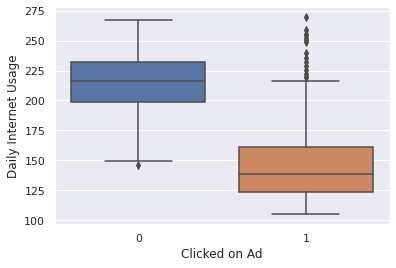

In [ ]:
sns.boxplot(y= "Daily Internet Usage", x= "Clicked on Ad", data= clickrate_df)

This graph demonstrates that those users who were online between 125-165 minutes a day were the greatest demographic driving ad clickrate. However, there are a few outliers in this category who also clicked on the ad, and their daily internet usage wasa bove 200 minutes a day. Let's break this down further: 


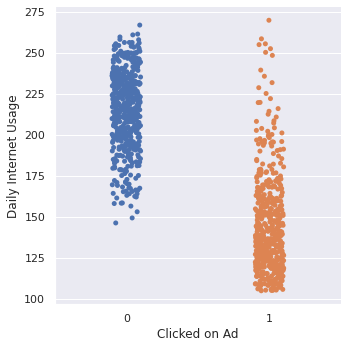

In [ ]:
sns.catplot(x="Clicked on Ad", y= "Daily Internet Usage", data= clickrate_df)

**Conclusion:** The Alternative Hypothesis is correct, there is a statistically significant relationship between daily internet usage and clickrate. 

**Recommendation:** The Stakeholder should target users who overall spend less time online than those who spend more time online. Specifically, users who spend between 125-165 minutes online a day are the most likely to click on ads. 

# **Recommendation**


---



All of our Alternative Hypotheses were true: There is marked statistical significance between the factors of daily time spent on site, age area income, and daily internet usage. However, these parameters presented some surprising findings.

Let's visualize all the data to aid the stakeholder in making advertising decisions:

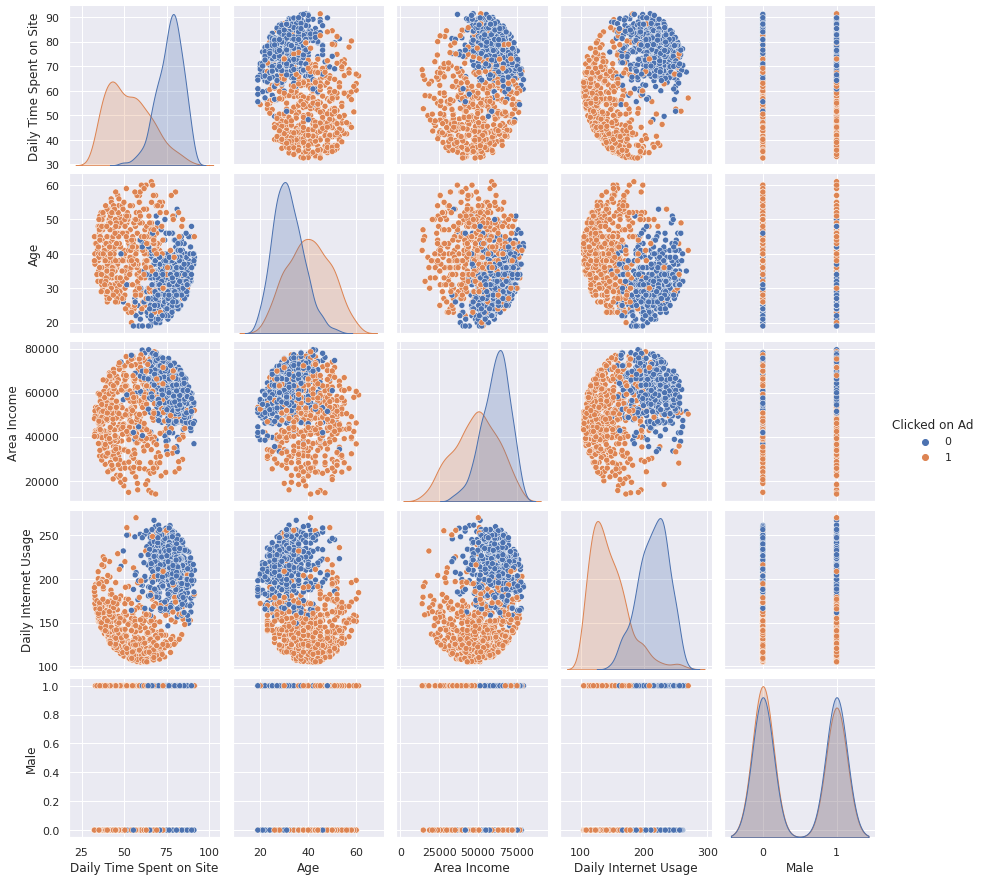

In [ ]:
sns.pairplot(data=clickrate_df, hue= 'Clicked on Ad')

**Actions:** Advertising should be targeted to users in the age range of 35-45, who make an income between 39K-55k per year. Additionally, we see users who spend *less* time online tend to click on the ads more than those who spend more time. 

These factors may indicate that users who are younger, who are online more, and who make higher salaries are less likely to click the ads. This could be due to the user working in IT or having a higher level of education, therefore they may be more skeptical about online advertising. 